## 이서범


[2025_12_11]_독버섯 감지 & 유방암 감지
- 필수
   * 교차검증
   * 데이터 누수 안됨!
   * 모델 : 앙상블 계열 => Voting, 배깅은 RandomForest
- 기한 : 주말(12월 14일 일요일까지)

In [ ]:
import pandas as pd
import numpy as np

# ML 학습관련
from sklearn.tree import DecisionTreeClassifier

## ML 데이터셋 및 전처리 관련
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder, OrdinalEncoder

## ML CV, Pipeline 관련 => 모델 일반화/최적 하이퍼파라미터 조사 및 데이터 누수 해결
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

## 앙상블
from sklearn.ensemble import RandomForestClassifier

## ML 성능지표 관련
from sklearn.metrics import f1_score

## 시각화 관련
import matplotlib.pyplot as plt


In [128]:
mushDF = pd.read_csv('../DATA/mushrooms.csv')
wdbcDF = pd.read_csv('../DATA/wdbc.csv')
display(mushDF, wdbcDF)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **독버섯 진행**

[1] 데이터 탐색 및 데이터 준비 <hr>
- 결측치 확인 / 데이터 타입 확인
- 특성 간의 상관관계 확인 및 시각화
- 피쳐 및 타겟 분리 


In [129]:
mushDF.info()
# mushDF.describe() ## 영어만 있어서 출력 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**mushrooms 데이터 해석**  
- **class (targetSR) : e - 식용 / p - 독성**
- 갓
    * cap-shape : 머리 모양
    * cap-surface : 갓 표면(매끄러운지 비늘이 있는지..)
    * cap-color : 갓 색상
- 냄새 ★
    * odor : 냄새
- 주름
    * gill-attachment : 주름 부착 형태
    * gill-spacing : 주름 간격
    * gill-size : 주름 크기
    * gill-color : 주름 색
- 줄기
    * stalk-shape : 굵기
    * stalk-root  

- 고리
    * ring-number 
    * ring-type 
- habitat : 서식지
- population : 개체 분포
- veil-type, veil-color : 값이 1개뿐

In [130]:
## 고유값 개수 확인
mushDF.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [131]:
mushDF.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [132]:
for i in mushDF.columns:
    mushDF[i] = mushDF[i].astype('category')

mushDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [133]:
## 피쳐 및 타겟 분리
featureDF = mushDF[mushDF.columns[1:]]
targetSR = mushDF[mushDF.columns[0]]

print(f'featureDF:{featureDF.shape},  targetSR:{targetSR.shape}')

featureDF:(8124, 22),  targetSR:(8124,)


In [134]:
## 학습용/테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)

In [135]:
## 타겟 컬럼 인코딩 처리
lbEncoder  = LabelEncoder()

en_y_train = lbEncoder.fit_transform(y_train)  ## 학습용 타겟으로 인코더 생성 후 변환까지 진행
en_y_test  = lbEncoder.transform(y_test)

print(en_y_train)

[1 0 0 ... 0 0 0]


**pipline + GridSearchCV 사용** <hr>
**앙상블 사용 전**

In [136]:
## ===================================================================
## 교차검증을 통한 일반화 성능 체크 + 최적의 하이퍼파라미터 찾기
## => GrdiSearchCV : 분류/회귀 교차검증, 최적 파라미터값, 성능 
## => Pipeline     : 튜닝 시 데이터 누수에 대한 보완 
## ===================================================================
## [4-1] Pipeline 인스턴스 생성 
##       -> 수치형 피쳐 : 스케일링
##       -> 모델 인스턴스 
pipeline = Pipeline(steps=[  ('scaler', OneHotEncoder()), 
                             ('dt_cls', DecisionTreeClassifier(random_state=42)) ]) 

## [4-2] GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict 
##       -> 모델 인스턴스 
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_ = { "dt_cls__max_depth" : [3, 5, 7], 
                "dt_cls__criterion" : ['gini', 'entropy', 'log_loss']}

## 여러 개 scoring 설정 -----------------------------------------
##  - accuracy: 정확도
##  - f1_micro: 클래스별 F1 평균(불균형일수록 macro/weighted가 중요)
##  - recall_micro, precision_micro 같이 추가 가능
scoring = {
    "accuracy": "accuracy",
    "f1_micro": "f1_micro",
    "precision_micro": "precision_micro",
    "recall_micro": "recall_micro"
}


# StratifiedKFold를 명시적으로 사용하여 교차 검증 설정 (분류 문제에서 안정적)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## GridSearchCV 인스턴스 생성
## -> refit='f1_micro' : 가장 좋은 파라미터 조합으로 최종 학습 시
##                       성능평가 기준 설정 
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict_, 
                      return_train_score=True,
                      scoring=scoring,
                      refit='f1_micro',
                      cv=cv_folds)


In [137]:
## [4-3] 교차검증 통한 최적의 하이퍼라마터 조사 및 성능 평가
gridCV.fit(x_train, en_y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'dt_cls__criterion': ['gini', 'entropy', ...], 'dt_cls__max_depth': [3, 5, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1_micro': 'f1_micro', 'precision_micro': 'precision_micro', 'recall_micro': 'recall_micro'}"
,n_jobs,None
,refit,'f1_micro'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,categories,'auto'


In [138]:
## 학습 후 모델 파라미터 통한 결과 확인 
print(f'best_score_  : {gridCV.best_score_}')
print(f'best_params_ : {gridCV.best_params_}')

best_score_  : 0.9996923076923077
best_params_ : {'dt_cls__criterion': 'gini', 'dt_cls__max_depth': 5}


<hr>

**앙상블 사용**

In [139]:
## ===================================================================
## 교차검증을 통한 일반화 성능 체크 + 최적의 하이퍼파라미터 찾기
## => GrdiSearchCV : 분류/회귀 교차검증, 최적 파라미터값, 성능 
## => Pipeline     : 튜닝 시 데이터 누수에 대한 보완 
## ===================================================================
## [4-1] Pipeline 인스턴스 생성 
##       -> 수치형 피쳐 : 스케일링
##       -> 모델 인스턴스 
pipeline = Pipeline(steps=[  ('scaler', OneHotEncoder()), 
                             ('rf_cls', RandomForestClassifier(random_state=42)) ]) 

## [4-2] GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict 
##       -> 모델 인스턴스 
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_rf = { "rf_cls__n_estimators" : [100, 200, 300], 
                  "rf_cls__max_depth" : [5, 10, None]}

## 여러 개 scoring 설정 -----------------------------------------
##  - accuracy: 정확도
##  - f1_micro: 클래스별 F1 평균(불균형일수록 macro/weighted가 중요)
##  - recall_micro, precision_micro 같이 추가 가능
scoring = {
    "accuracy": "accuracy",
    "f1_micro": "f1_micro",
    "precision_micro": "precision_micro",
    "recall_micro": "recall_micro"
}


# StratifiedKFold를 명시적으로 사용하여 교차 검증 설정 (분류 문제에서 안정적)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## GridSearchCV 인스턴스 생성
## -> refit='f1_micro' : 가장 좋은 파라미터 조합으로 최종 학습 시
##                       성능평가 기준 설정 
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict_rf, 
                      return_train_score=True,
                      scoring=scoring,
                      refit='f1_micro',
                      cv=cv_folds)


In [140]:
## [4-3] 교차검증 통한 최적의 하이퍼라마터 조사 및 성능 평가
gridCV.fit(x_train, en_y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf_cls__max_depth': [5, 10, ...], 'rf_cls__n_estimators': [100, 200, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1_micro': 'f1_micro', 'precision_micro': 'precision_micro', 'recall_micro': 'recall_micro'}"
,n_jobs,None
,refit,'f1_micro'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,categories,'auto'


In [141]:
## 학습 후 모델 파라미터 통한 결과 확인 
print(f'best_score_  : {gridCV.best_score_}')
print(f'best_params_ : {gridCV.best_params_}')

best_score_  : 1.0
best_params_ : {'rf_cls__max_depth': 10, 'rf_cls__n_estimators': 100}


In [142]:
# 테스트 데이터로 최종 예측 수행
test_predictions = gridCV.predict(x_test) 

final_f1_score = f1_score(en_y_test, test_predictions, average='macro')

print(f"\n--- 최종 테스트 데이터 성능 ---")
print(f"성능(test데이터 + macro 사용) : {final_f1_score:.4f}")


--- 최종 테스트 데이터 성능 ---
성능(test데이터 + macro 사용) : 1.0000


## **유방암 데이터 진행**

[1] 데이터 탐색 및 데이터 준비 <hr>
- 결측치 확인 / 데이터 타입 확인
- 특성 간의 상관관계 확인 및 시각화
- 피쳐 및 타겟 분리 


In [143]:
wdbcDF.info()
# mushDF.describe() ## 영어만 있어서 출력 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [161]:
wdbcDF.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


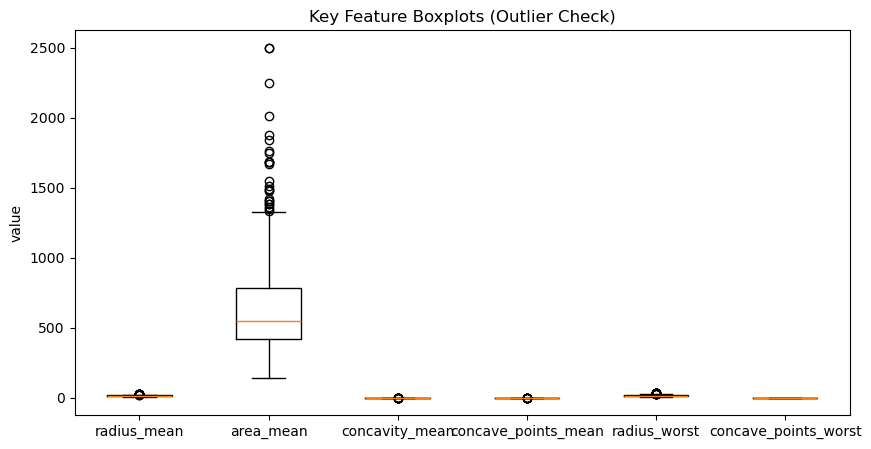

In [ ]:
key_features = [
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concave_points_mean',
    'radius_worst',
    'concave_points_worst'
]

plt.figure(figsize=(10,5))
plt.boxplot(wdbcDF[key_features])
plt.xticks(range(1, len(key_features)+1), key_features)
plt.ylabel('value')
plt.show()


## 🧬 Breast Cancer (WDBC) 데이터 피처 해석

- **diagnosis (target)**
  - `M` : 악성 종양 (Malignant)
  - `B` : 양성 종양 (Benign)

---

### 1. 크기 관련 특징
- **radius** : 세포핵 중심에서 경계까지의 평균 거리
- **perimeter** : 세포핵의 둘레 길이
- **area** : 세포핵의 면적

> 종양이 악성일수록 크기 관련 값이 커지는 경향이 있음

---

### 2. 표면 및 형태 특징
- **texture** : 세포핵 경계 주변의 회색조 값 변화(질감)
- **smoothness** : 세포핵 경계의 매끄러움 정도
- **compactness** : 세포핵의 조밀도  
  \((perimeter^2 / area) - 1\)
- **symmetry** : 세포핵 형태의 대칭성

---

### 3. 경계 불규칙성 ★
- **concavity** : 세포핵 경계의 오목한 정도
- **concave points** : 오목한 부분의 개수/강도

> 악성 종양일수록 경계가 불규칙하여 값이 커지는 경향이 있음

---

### 4. 복잡도
- **fractal dimension** : 세포핵 경계의 복잡도 지표  
  (경계가 복잡할수록 값 증가)

---

### 5. 통계적 표현 방식
각 특징은 다음 3가지 통계값으로 제공됨

- **`*_mean`** : 해당 특징의 평균값
- **`*_se`** : 해당 특징의 표준오차(Standard Error)
- **`*_worst`** : 가장 큰 값들을 대표하는 값 (worst case)

> 총 10개 기본 특징 × 3가지 통계값 = **30개 피처**

---

### 요약
- 본 데이터는 **유방 종양 세포핵의 형태적 특징**을 기반으로  
  **양성(B) / 악성(M)을 분류**하는 문제이다.
- 특히 **크기, 경계 불규칙성, 복잡도 관련 피처**가  
  악성 여부 판단에 중요한 역할을 한다.


In [144]:
wdbcDF.corr(numeric_only=True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


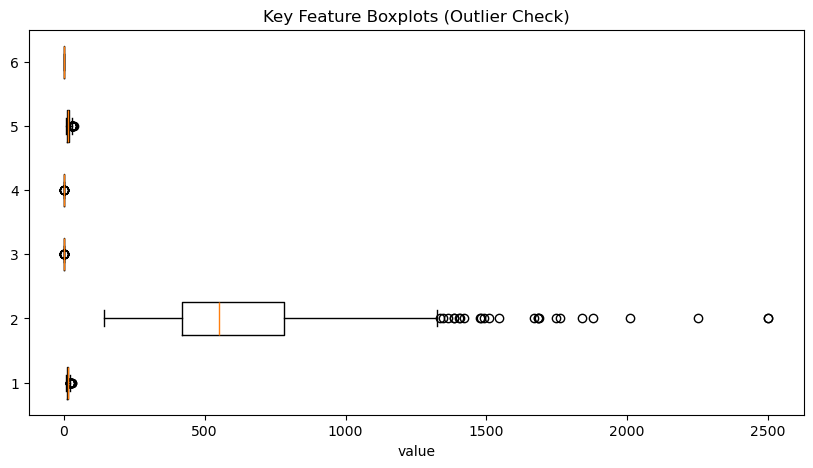

In [145]:
key_features = [
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concave_points_mean',
    'radius_worst',
    'concave_points_worst'
]

plt.figure(figsize=(10,5))
plt.boxplot(wdbcDF[key_features], vert=False)
plt.title('Key Feature Boxplots (Outlier Check)')
plt.xlabel('value')
plt.show()


In [146]:
## 고유값 개수 확인
wdbcDF.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [147]:
wdbcDF.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [148]:
wdbcDF['diagnosis'] = wdbcDF['diagnosis'].astype('category')

wdbcDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave_points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [149]:
## 피쳐 및 타겟 분리
featureDF = wdbcDF[wdbcDF.columns[2:]]
targetSR = wdbcDF[wdbcDF.columns[1]]

print(f'featureDF:{featureDF.shape},  targetSR:{targetSR.shape}')

featureDF:(569, 30),  targetSR:(569,)


In [150]:
## 학습용/테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)

In [151]:
## 타겟 컬럼 인코딩 처리
lbEncoder  = LabelEncoder()

en_y_train = lbEncoder.fit_transform(y_train)  ## 학습용 타겟으로 인코더 생성 후 변환까지 진행
en_y_test  = lbEncoder.transform(y_test)

# print(en_y_train)

**pipline + GridSearchCV 사용** <hr>


In [152]:
## ===================================================================
## 교차검증을 통한 일반화 성능 체크 + 최적의 하이퍼파라미터 찾기
## => GrdiSearchCV : 분류/회귀 교차검증, 최적 파라미터값, 성능 
## => Pipeline     : 튜닝 시 데이터 누수에 대한 보완 
## ===================================================================
## [4-1] Pipeline 인스턴스 생성 
##       -> 수치형 피쳐 : 스케일링
##       -> 모델 인스턴스 
pipeline = Pipeline(steps=[  ('scaler', RobustScaler()), 
                             ('rf_cls', RandomForestClassifier(random_state=42)) ]) 

## [4-2] GridSearchCV 준비
##       -> 최적화할 하이퍼파라미터 값 dict 
##       -> 모델 인스턴스 
##            { "pipeline_모델변수명_ _하이퍼파라미터이름" : [학습알고리즘 클래스 확인]  }
param_dict_rf = { "rf_cls__n_estimators" : [100, 200, 300], 
                  "rf_cls__max_depth" : [5, 10, None]}

## 여러 개 scoring 설정 -----------------------------------------
##  - accuracy: 정확도
##  - f1_micro: 클래스별 F1 평균(불균형일수록 macro/weighted가 중요)
##  - recall_micro, precision_micro 같이 추가 가능
scoring = {
    "accuracy": "accuracy",
    "f1_micro": "f1_micro",
    "precision_micro": "precision_micro",
    "recall_micro": "recall_micro"
}


# StratifiedKFold를 명시적으로 사용하여 교차 검증 설정 (분류 문제에서 안정적)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## GridSearchCV 인스턴스 생성
## -> refit='f1_micro' : 가장 좋은 파라미터 조합으로 최종 학습 시
##                       성능평가 기준 설정 
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict_rf, 
                      return_train_score=True,
                      scoring=scoring,
                      refit='f1_micro',
                      cv=cv_folds)


In [153]:
## [4-3] 교차검증 통한 최적의 하이퍼라마터 조사 및 성능 평가
gridCV.fit(x_train, en_y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf_cls__max_depth': [5, 10, ...], 'rf_cls__n_estimators': [100, 200, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1_micro': 'f1_micro', 'precision_micro': 'precision_micro', 'recall_micro': 'recall_micro'}"
,n_jobs,None
,refit,'f1_micro'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,with_centering,True


In [154]:
## 학습 후 모델 파라미터 통한 결과 확인 
print(f'best_score_  : {gridCV.best_score_}')
print(f'best_params_ : {gridCV.best_params_}')

best_score_  : 0.9670329670329672
best_params_ : {'rf_cls__max_depth': 5, 'rf_cls__n_estimators': 100}


In [155]:
# 테스트 데이터로 최종 예측 수행
test_predictions = gridCV.predict(x_test) 

final_f1_score = f1_score(en_y_test, test_predictions, average='macro')

print(f"\n--- 최종 테스트 데이터 성능 ---")
print(f"성능(test데이터 + macro 사용) : {final_f1_score:.4f}")


--- 최종 테스트 데이터 성능 ---
성능(test데이터 + macro 사용) : 0.9713
